# Introduction to

<img src="./julia_logo.png" alt="Julia toolchain" style="width: 400px;"/>

## Types of computer languages

* **Compiled languages**: C/C++, Fortran, ... 
  - Directly compiled to machine code that is executed by CPU 
  - Pros: fast, memory efficient
  - Cons: longer development time, hard to debug

* **Interpreted language**: R, Matlab, Python, SAS IML, JavaScript, ... 
  - Interpreted by interpreter
  - Pros: fast prototyping
  - Cons: excruciatingly slow for loops

* Mixed (dynamic) languages: Matlab (JIT), R (`compiler` package), Julia, Cython, JAVA, ...
  - Pros and cons: between the compiled and interpreted languages

* Script languages: Linux shell scripts, Perl, ...
  - Extremely useful for some data preprocessing and manipulation

* Database languages: SQL, Hadoop.  
  - Data analysis *never* happens if we do not know how to retrieve data from databases  

## Messages

* To be versatile in the big data era, master at least one language in each category.

* To improve efficiency of interpreted languages such as R or Matlab, conventional wisdom is to avoid loops as much as possible. Aka, **vectorize code**
> The only loop you are allowed to have is that for an iterative algorithm.

* When looping is necessary, need to code in C, C++, or Fortran.  
Success stories: the popular `glmnet` package in R is coded in Fortran.

* Modern languages such as Julia tries to solve the **two language problem**. That is to achieve efficiency without vectorizing code.

## What's Julia?

> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments

* Started in 2009. First public release in 2012. 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - Current release v0.6.2
  - v1.0 is staged to release in 2018

* Aim to solve the notorious **two language problem**:
    - Prototype code goes into high-level languages like R/Python, production code goes into low-level language like C/C++
> Walks like Python. Runs like C.

<img src="./julia_vs_otherlang.png" align="center" width="600"/>

* Write high-level, abstract code that closely resembles mathematical formulas
    - yet produces fast, low-level machine code that has traditionally only been generated by static languages.

* Julia is more than just "Fast R" or "Fast Matlab"
    - Performance comes from features that work well together.  
    - You can't just take the magic dust that makes Julia fast and sprinkle it on [language of choice]

## R is great, but...

* It's not meant for high performance computing
  - http://adv-r.had.co.nz/Performance.html
    - Section on performance starts with "Why is R slow?" 

* Deficiencies in the core language 
  - Many fixed with packages (`devtools`, `roxygen2`, `Matrix`)
  - Others harder to fix (R uses an old version of BLAS)
  - Some impossible to fix (clunky syntax, poor design choices)

* Only 6 active developers left (out of 20 R-Core members)
  - JuliaLang organization has 74 members, with 567 total contributors (as of 3/3/17)
    - https://github.com/JuliaLang/julia/graphs/contributors

* Doug Bates (member of R-Core, `Matrix` and `lme4`)
    - Getting Doug on board was a big win for statistics with Julia, as he brought a lot of knowledge about the history of R development and design choices
    - https://github.com/dmbates/MixedModels.jl
    
    > As some of you may know, I have had a (rather late) mid-life crisis and run off with another language called Julia.   
    >
    > -- <cite>Doug Bates (on the `knitr` Google Group)</cite>

## Language features of R, Matlab and Julia

|        Features       |             R            |     Matlab     |        Julia        |
|:---------------------:|:------------------------:|:--------------:|:-------------------:|
|      Open source      |           👍         |      👎      |         👍        |
|          IDE          |    RStudio 👍 👍 👍 | 👍 👍 👍 |    Atom+Juno 👎   |
|    Dynamic document   | RMarkdown 👍 👍 👍 |    👍 👍   |   Jupyter 👍 👍  |
|    Multi-threading    |    `parallel` 👎  |      👍      |  👍 👍 [see docs](http://docs.julialang.org/en/stable/manual/parallel-computing/)  |
|          JIT          |    `compiler` 👎  |    👍 👍   |    👍 👍 👍   |
|     Call C/Fortran    |      wrapper, `Rcpp`     |     wrapper    | [no glue code needed](http://docs.julialang.org/en/stable/manual/calling-c-and-fortran-code/) |
|  Call shared library  |          wrapper         |     wrapper    | [no glue code needed](http://docs.julialang.org/en/stable/manual/calling-c-and-fortran-code/) |
|         Type system        |           👎           |    👍 👍   |    👍 👍 👍   |
|   Pass by reference   |           👎           |      👎      |    👍 👍 👍   |
|     Linear algebra    |           👎           |   MKL, Arpack  |  OpenBLAS, eigpack, or MKL  |
| Distributed computing |           👎           |      👍      |    👍 👍 👍   |
| Sparse linear algebra |  `Matrix` package 👎   | 👍 👍 👍 |    👍 👍 👍   |
|     Documentation     |           👍           | 👍 👍 👍 |      👍      |
|        Profiler       |    👍 👍        | 👍 👍 👍 |    👍  |

## Benchmark

* Benchmark code `R-benchmark-25.R` from [http://r.research.att.com/benchmarks/R-benchmark-25.R](http://r.research.att.com/benchmarks/R-benchmark-25.R) covers many commonly used numerical operations used in statistics. 

* We ported to [Matlab](./benchmark_matlab.m) and [Julia](./benchmark_julia.jl) and report the run times (averaged over 5 runs) here.

|                        Test                        | R 3.4.3 | Matlab R2017a | Julia 0.6.2 |
|:-------------------------------------------------- |:-------:|:-------------:|:-----------:|
| Matrix creation, trans., deform. (2500 x 2500) |   0.65  |      **0.13**     |   0.21  |
|      Power of matrix (2400 x 2400, `A.^1000`)      |   0.18  |    **0.10**   |     0.18    |
|          Quick sort ($n = 7 \times 10^6$)          |   0.75  |    **0.30**   |     0.65    |
|         Cross product (2800 x 2800, $A^TA$)        |  15.02  |    **0.18**   |  0.23  |
|            LS solution ($n = p = 2000$)            |   7.00  |    0.07   |     **0.06**    |
|                FFT ($n = 2,400,000$)               |   0.32  |    **0.03**   |     0.04    |
|           Eigen-values ($600 \times 600$)          |   0.75  |    **0.22**   |     0.26    |
|          Determinant ($2500 \times 2500$)          |   3.77  |      0.19     |   **0.14**  |
|            Cholesky ($3000 \times 3000$)           |   5.54  |    **0.08**   |     0.17    |
|         Matrix inverse ($1600 \times 1600$)        |   4.13  |    **0.11**   |     0.14    |
|           Fibonacci (vector calculation)           |   0.23  |    **0.16**   |     0.27    |
|            Hilbert (matrix calculation)            |   0.27  |      0.07     |   **0.06**  |
|                   GCD (recursion)                  |   0.42  |    **0.09**     |   0.16  |
|               Toeplitz matrix (loops)              |   0.32  |     0.0012    |  **0.0007** |
|                 Escoufiers (mixed)                 |   0.30  |      0.15     |   **0.14**  |

Machine specs: Intel i7 @ 2.9GHz (4 physical cores, 8 threads), 16G RAM, Mac OS 10.13.3.

## Gibbs sampler example by Doug Bates

* An example from Dr. Doug Bates's slides [Julia for R Programmers](http://www.stat.wisc.edu/~bates/JuliaForRProgrammers.pdf).

* The task is to create a Gibbs sampler for the density  
$$
f(x, y) = k x^2 exp(- x y^2 - y^2 + 2y - 4x), x > 0
$$
using the conditional distributions
$$
\begin{eqnarray*}
  X | Y &\sim& \Gamma \left( 3, \frac{1}{y^2 + 4} \right) \\
  Y | X &\sim& N \left(\frac{1}{1+x}, \frac{1}{2(1+x)} \right).
\end{eqnarray*}
$$

* This is a Julia function for the simple Gibbs sampler:

In [28]:
using Distributions

function jgibbs(N, thin)
    mat = zeros(N, 2)
    x = y = 0.0
    for i in 1:N
        for j in 1:thin
            x = rand(Gamma(3.0, 1.0 / (y * y + 4.0)))
            y = rand(Normal(1.0 / (x + 1.0), 1.0 / sqrt(2.0(x + 1.0))))
        end
        mat[i, 1] = x
        mat[i, 2] = y
    end
    mat
end

jgibbs (generic function with 1 method)

Generate a bivariate sample of size 10,000 with a thinning of 500. How long does it take?

In [30]:
jgibbs(100, 5); # warm-up
@elapsed jgibbs(10000, 500)

0.399187319

* R solution. The `RCall.jl` package allows us to execute R code without leaving the `Julia` environment. We first define an R function `Rgibbs()`.

In [31]:
using RCall

R"""
library(Matrix)
Rgibbs <- function(N, thin) {
  mat <- matrix(0, nrow=N, ncol=2)
  x <- y <- 0
  for (i in 1:N) {
    for (j in 1:thin) {
      x <- rgamma(1, 3, y * y + 4) # 3rd arg is rate
      y <- rnorm(1, 1 / (x + 1), 1 / sqrt(2 * (x + 1)))
    }
    mat[i,] <- c(x, y)
  }
  mat
}
"""

RCall.RObject{RCall.ClosSxp}
function (N, thin) 
{
    mat <- matrix(0, nrow = N, ncol = 2)
    x <- y <- 0
    for (i in 1:N) {
        for (j in 1:thin) {
            x <- rgamma(1, 3, y * y + 4)
            y <- rnorm(1, 1/(x + 1), 1/sqrt(2 * (x + 1)))
        }
        mat[i, ] <- c(x, y)
    }
    mat
}


and then generate the same number of samples

In [32]:
# benchmark
@elapsed R"""
system.time(Rgibbs(10000, 500))
"""

22.18672895

We see 40-80 fold speed up of `Julia` over `R` on this example, **without extra coding effort**!

## Some resources for learning Julia

0. [Intro to Julia](https://www.youtube.com/watch?v=4igzy3bGVkQ) (1h40m), by Jane Herriman (Dec 19, 2017), and next (monthly) tutorial    
[Intro to Julia](https://www.youtube.com/watch?v=JserqX6hbYw), by Jane Herriman on April 6, 2018 at 10AM PDT.  
0. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  
0. Browse the `Julia` [documentation](http://docs.julialang.org/en/stable/).  
0. For Matlab users, read [Noteworthy Differences From Matlab](http://docs.julialang.org/en/stable/manual/noteworthy-differences/?highlight=matlab#noteworthy-differences-from-matlab).  
For R users, read [Noteworthy Differences From R](http://docs.julialang.org/en/stable/manual/noteworthy-differences/?highlight=matlab#noteworthy-differences-from-r).  
For Python users, read [Noteworthy Differences From Python](http://docs.julialang.org/en/stable/manual/noteworthy-differences/?highlight=matlab#noteworthy-differences-from-python).  
0. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL (Read-Evaluation-Print-Loop)

The `Julia` REPL has four main modes.

0. Default mode is the Julian prompt `julia>`. Type backspace in other modes to enter default mode.    

0. Help mode `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.  

0. Shell mode `shell>`. Type `;` to enter shell mode.  

0. Search mode `(reverse-i-search)`. Press `ctrl+R` to enter search model. 

With `RCall.jl` package installed, we can enter the R mode by typing `$` (shift+4) at Julia REPL.

## Which IDE?

* I highly recommend the editor [Atom](https://atom.io) with packages `julia-client`, `language-julia`, and `latex-completions` installed. 

* If you want RStudio- or Matlab- like IDE, install the `uber-juno` package in Atom. Follow instructions at [https://github.com/JunoLab/uber-juno/blob/master/setup.md](https://github.com/JunoLab/uber-juno/blob/master/setup.md).

* [**JuliaPro**](https://juliacomputing.com/products/juliapro.html) bundles Julia, Atom, Juno, and many commonly used packages.

* For homework, I recommend [**JupyterLab**](http://jupyterlab.readthedocs.io/en/stable/index.html), which is supposed to replace Jupyter Notebook after it reaches v1.0.

## Julia package system

<img src="http://pkg.julialang.org/img/allver.svg" width="500" align="center"/>

* Each Julia package is a Git repository. 

* Each Julia package name ends with `.jl`.  
Google search with `PackageName.jl` usually leads to the package on github.com.  

* For example, the package called `Distributions.jl` is added with
```julia
Pkg.add("Distributions")   # no .jl 
```
and "removed" (although not completely deleted) with
```julia
Pkg.rm("Distributions")
```

* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* The package ecosystem is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at [http://pkg.julialang.org/](http://pkg.julialang.org/).

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
Pkg.clone("git@github.com:OpenMendel/SnpArrays.jl.git")
```

* A package need only be added once, at which point it is downloaded into your local `.julia/vx.x` directory in your home directory. If you start having problems with packages that seem to be unsolvable, you can try just deleting your .julia directory and reinstalling all your packages. 

For JuliaPro, the packages are downloaed to directory `/Applications/JuliaPro-0.6.2.2.app/Contents/Resources/pkgs-0.6.2.2/v0.6/`.

* Periodically, you should run `Pkg.update()` which checks for, downloads and installs updated versions of all the packages you currently have installed.

* `Pkg.status()` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
Now, the functions from the Distributions package are available only using 
```julia
Distributions.<FUNNAME>
```
All functions, not only exported functions, are always available like this.

## [JuliaStats](http://juliastats.github.io)

A collection of many statistical packages in Julia:

- [StatsBase.jl](https://github.com/JuliaStats/StatsBase.jl)
- [Distributions.jl](https://github.com/JuliaStats/Distributions.jl)
- [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl)
- [GLM.jl](https://github.com/JuliaStats/GLM.jl)  
- ...

## Calling R from Julia

* The `RCall.jl` package allows you to embed R code inside of Julia.

* There are also `PyCall`, `MATLAB`, `JavaCall`, `CxxWrap` packages.

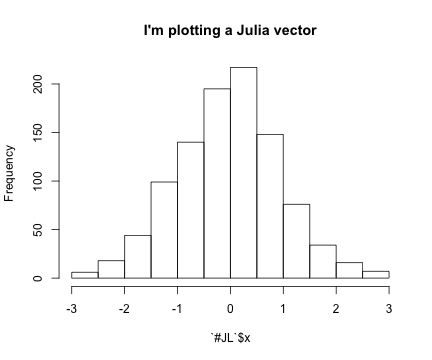

RCall.RObject{RCall.VecSxp}
$breaks
 [1] -3.0 -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0

$counts
 [1]   6  18  44  99 140 195 217 148  76  34  16   7

$density
 [1] 0.012 0.036 0.088 0.198 0.280 0.390 0.434 0.296 0.152 0.068 0.032 0.014

$mids
 [1] -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25  2.75

$xname
[1] "`#JL`$x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [33]:
using RCall

x = randn(1000)
R"""
hist($x, main="I'm plotting a Julia vector")
"""

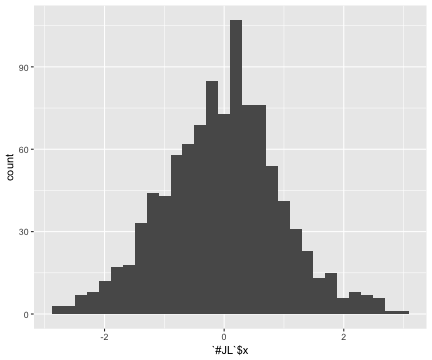

RCall.RObject{RCall.VecSxp}


In [34]:
R"""
library(ggplot2)
qplot($x) 
"""

In [35]:
x = R"""
rnorm(10)
"""

RCall.RObject{RCall.RealSxp}
 [1]  0.58417664 -0.27544734 -0.49257923 -0.15185668 -0.36822255 -1.36088327
 [7] -0.52415207  0.30688360  0.03670807  0.74413234


In [11]:
collect(x)

10-element Array{Float64,1}:
  2.44096   
 -1.67341   
 -0.219075  
  0.175992  
 -0.500275  
  1.31459   
 -0.304738  
 -0.271341  
 -0.00799315
  0.0438026 

## Some basic Julia code

In [18]:
y = 1

1

In [19]:
typeof(y)

Int64

In [20]:
y = 1.0

1.0

In [21]:
typeof(y)

Float64

In [22]:
# Greek letters:  `\pi<tab>`
θ = y + π

4.141592653589793

In [23]:
# emoji! `\:kissing_cat:<tab>`
😽 = 5.0

5.0

In [18]:
# vector Float64 0s
x = zeros(5)

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [8]:
# vector Int64 0s
x = zeros(Int64, 5)

5-element Array{Int64,1}:
 0
 0
 0
 0
 0

In [24]:
# matrix of Float64 0s
x = zeros(5, 3)

5×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [17]:
# matrix of Float64 1s
x = ones(5, 3)

5×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [18]:
# define array without initialization
x = Array{Float64}(5, 3)

5×3 Array{Float64,2}:
 0.0  0.0           2.40266e-314
 0.0  0.0           2.40266e-314
 0.0  2.40266e-314  0.0         
 0.0  0.0           2.40266e-314
 0.0  2.38398e-314  2.40266e-314

In [19]:
# fill a matrix by 0s
fill!(x, 0)

5×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [25]:
# uniform random numbers
x = rand(5, 3)

5×3 Array{Float64,2}:
 0.454823  0.8484    0.0284134
 0.485442  0.120981  0.879536 
 0.039326  0.913217  0.954439 
 0.776128  0.94727   0.162286 
 0.28619   0.175539  0.572378 

In [11]:
# random numbers from 1-5
x = rand(1:5, 5)

5-element Array{Int64,1}:
 2
 2
 2
 2
 1

In [26]:
# standard normal random numbers
x = randn(5, 3)

5×3 Array{Float64,2}:
 -0.401035  -0.106403    0.0785246
 -0.393053  -0.678204    0.119353 
 -0.711422   1.05164    -0.490673 
  0.255229   0.277168   -0.419401 
 -0.275601  -0.0785446   0.324448 

In [27]:
# range
1:10

1:10

In [28]:
typeof(1:10)

UnitRange{Int64}

In [29]:
# integers 1-10
x = collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [30]:
# Float64 numbers 1-10
x = collect(1.0:10)

10-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [31]:
# convert to a specific type
convert(Vector{Float64}, 1:10)

10-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Timing and benchmark

In [47]:
srand(123) # seed
x = randn(1000)
@time sum(x) # first run includes compilation time
@time sum(x) # no compilation time after first run

  0.000003 seconds (5 allocations: 176 bytes)
  0.000002 seconds (5 allocations: 176 bytes)


25.797499734233416

Use `BenchmarkTools.jl` for more robust benchmarking. Analog of `microbenchmark` package in R.

In [48]:
using BenchmarkTools

@benchmark sum(x)

BenchmarkTools.Trial: 
  memory estimate:  16 bytes
  allocs estimate:  1
  --------------
  minimum time:     290.983 ns (0.00% GC)
  median time:      308.188 ns (0.00% GC)
  mean time:        318.623 ns (0.21% GC)
  maximum time:     7.310 μs (93.47% GC)
  --------------
  samples:          10000
  evals/sample:     234

## Linear algebra

Basic indexing

In [13]:
# 5 × 5 matrix of random Normal(0, 1)
x = randn(5, 5) 

5×5 Array{Float64,2}:
 -1.25364   -0.338904  -0.147207  0.503911   1.157   
  1.1703     0.76705    0.320185  1.75332    0.621152
  0.326569  -0.580977   0.912539  1.35446    0.182269
  2.14729   -0.299907   0.536788  0.427365  -1.58998 
 -1.50539    1.53202    0.164638  1.99646    0.266706

In [15]:
# get first column
x[:, 1]

5-element Array{Float64,1}:
 -1.25364 
  1.1703  
  0.326569
  2.14729 
 -1.50539 

In [16]:
# get first row
x[1, :]

5-element Array{Float64,1}:
 -1.25364 
 -0.338904
 -0.147207
  0.503911
  1.157   

In [36]:
# getting a subset of a matrix creates a copy, but you can also create "views"
@view x[2:end, 1:(end-2)]

4×3 SubArray{Float64,2,Array{Float64,2},Tuple{UnitRange{Int64},UnitRange{Int64}},false}:
 -0.495064  -0.377066  -1.59551 
 -1.87172    1.8414    -0.444458
  0.462058  -0.817429   0.288825
 -0.114021  -0.124205   0.405866

Support for Sparse Matrices

In [37]:
# 10-by-10 sparse matrix with sparsity 0.1
X = sprandn(10, 10, .1)

10×10 SparseMatrixCSC{Float64,Int64} with 12 stored entries:
  [6 ,  1]  =  0.164694
  [10,  1]  =  0.565922
  [4 ,  2]  =  1.079
  [9 ,  2]  =  -0.464587
  [1 ,  3]  =  -1.17006
  [5 ,  4]  =  0.933898
  [4 ,  5]  =  -0.630407
  [8 ,  5]  =  0.424409
  [5 ,  7]  =  -1.31409
  [1 ,  8]  =  0.442987
  [8 ,  8]  =  0.86305
  [10,  9]  =  -0.223873

In [39]:
# convert to dense matrix
Xfull = full(X)

10×10 Array{Float64,2}:
 0.0        0.0       -1.17006  …   0.0      0.442987   0.0       0.0
 0.0        0.0        0.0          0.0      0.0        0.0       0.0
 0.0        0.0        0.0          0.0      0.0        0.0       0.0
 0.0        1.079      0.0          0.0      0.0        0.0       0.0
 0.0        0.0        0.0         -1.31409  0.0        0.0       0.0
 0.164694   0.0        0.0      …   0.0      0.0        0.0       0.0
 0.0        0.0        0.0          0.0      0.0        0.0       0.0
 0.0        0.0        0.0          0.0      0.86305    0.0       0.0
 0.0       -0.464587   0.0          0.0      0.0        0.0       0.0
 0.565922   0.0        0.0          0.0      0.0       -0.223873  0.0

In [40]:
# convert a dense matrix to sparse matrix
sparse(Xfull)

10×10 SparseMatrixCSC{Float64,Int64} with 12 stored entries:
  [6 ,  1]  =  0.164694
  [10,  1]  =  0.565922
  [4 ,  2]  =  1.079
  [9 ,  2]  =  -0.464587
  [1 ,  3]  =  -1.17006
  [5 ,  4]  =  0.933898
  [4 ,  5]  =  -0.630407
  [8 ,  5]  =  0.424409
  [5 ,  7]  =  -1.31409
  [1 ,  8]  =  0.442987
  [8 ,  8]  =  0.86305
  [10,  9]  =  -0.223873

In [41]:
# syntax for sparse linear algebra is same
β = ones(10)
X * β

10-element Array{Float64,1}:
 -0.727075
  0.0     
  0.0     
  0.448596
 -0.380195
  0.164694
  0.0     
  1.28746 
 -0.464587
  0.342049

## Functions 

* Defining functions on one line.
    - `::SomeType` is a (optional) type annotation
    - I only want my `regression` function to work with a Matrix and a Vector

In [35]:
regression(x::Matrix, y::Vector) = x \ y

regression (generic function with 1 method)

* Defining functions on multiple lines.
    - Code blocks (for loops, if statements, etc., require an `end`)
    - Function returns the values in the last line

In [36]:
function regression(x::Matrix{Float64}, y::Vector{Float64})
    x \ y
end

regression (generic function with 2 methods)

* Using our `regression` function

In [37]:
srand(123) # random seed
x = randn(100, 5)
y = randn(100)
@show typeof(x), typeof(y)
regression(x, y)

(typeof(x),typeof(y)) = (Array{Float64,2},Array{Float64,1})


5-element Array{Float64,1}:
 -0.0761932
  0.0197167
 -0.147183 
  0.0613367
 -0.0844392

* Which function are we using?

In [38]:
@which regression(x, y)

regression(x::Array{Float64,2}, y::Array{Float64,1}) at In[36]:2

In [39]:
x2 = randn(Float32, 100, 5)
y2 = randn(Float32, 100)
typeof(x2), typeof(y2)

(Array{Float32,2},Array{Float32,1})

In [40]:
@which regression(x2, y2)

regression(x::Array{T<:Any,2}, y::Array{T<:Any,1}) at In[35]:1

* Some types are parameterized by another type.
    - `Matrix{Float64}` is a two-dimensional array where each element is a `Float64`
    - Note: `Matrix{T}` is an alias for `Array{T, 2}`
    - Our first definition of `regression` will accept a `Matrix` and `Vector` with any element types.  
    The second definition is more restrictive.

* We have not overwritten the previous definition!
    - We have added a method
    - This is called **multiple dispatch**  
        - Different code is called **depending on the types of the arguments** 
        - **The most specific method available is called**

In [41]:
methods(regression)

# 2 methods for generic function "regression":
regression(x::Array{Float64,2}, y::Array{Float64,1}) at In[36]:2
regression(x::Array{T<:Any,2}, y::Array{T<:Any,1}) at In[35]:1

## Type system

* When thinking about types, think about sets.

* Everything is a subtype of the abstract type `Any`.

* An abstract type defines a set of types
    - Consider types in Julia that are a `Number`:

<img src="tree.png" width="600" align="center"/>

* You can explore type hierarchy with `typeof()`, `supertype()`, and `subtypes()`.

In [42]:
typeof(1.0), typeof(1)

(Float64,Int64)

In [43]:
supertype(Float64)

AbstractFloat

In [44]:
subtypes(AbstractFloat)

4-element Array{Any,1}:
 BigFloat
 Float16 
 Float32 
 Float64 

In [45]:
# Is Float64 a subtype of AbstractFloat?
Float64 <: AbstractFloat

true

* What properties does a `Number` have?
  - You can add numbers (`+`)
  - You can multiply numbers (`*`)
  - etc.

* This definition is too broad, since some things can't be added 
```julia
g(x) = x + x
```

* This definition is too restrictive, since any Number can be added
```julia
g(x::Float64) = x + x
```

* This will automatically work on the entire type tree above!
```julia
g(x::Number) = x + x
```
This is a lot nicer than 
```julia
function g(x)
    if isa(x, Number)
        return x + x
    else
        throw(ArgumentError("x should be a number"))
    end
end
```

## Just-in-time compilation (JIT)

Following figures and some examples are taken from Arch D. Robinson's slides [Introduction to Writing High Performance Julia](https://docs.google.com/viewer?a=v&pid=sites&srcid=ZGVmYXVsdGRvbWFpbnxibG9uem9uaWNzfGd4OjMwZjI2YTYzNDNmY2UzMmE).

| <img src="./julia_toolchain.png" alt="Julia toolchain" style="width: 400px;"/> | <img src="./julia_introspect.png" alt="Julia toolchain" style="width: 500px;"/> |
|----------------------------------|------------------------------------|
|||

In [20]:
x = randn(100)
@time sum(x) # first call invokes compilation
@time sum(x) # second run doesn't need compilation anymore

  0.002007 seconds (20 allocations: 1.234 KiB)
  0.000003 seconds (5 allocations: 176 bytes)


1.261564661337589

* `Julia`'s efficiency results from its capabilities to infer the types of *all* variables within a function and then call LLVM to generate optimized machine code at run-time. 

In [47]:
g(x) = x + x

g (generic function with 1 method)

This function will work on **any** type which has a method for `+`.

In [48]:
@show g(2)
@show g(2.0);

g(2) = 4
g(2.0) = 4.0


This the abstract syntax tree (AST).

In [49]:
@code_lowered g(2)

LambdaInfo template for g(x) at In[47]:1
:(begin 
        nothing
        return x + x
    end)

Peek at the compiled code (**LLVM bitcode**) with `@code_llvm`

In [50]:
@code_llvm g(2)


define i64 @julia_g_73461(i64) #0 {
top:
  %1 = shl i64 %0, 1
  ret i64 %1
}


In [51]:
@code_llvm g(2.0)


define double @julia_g_73465(double) #0 {
top:
  %1 = fadd double %0, %0
  ret double %1
}


We didn't provide a type annotation. But different code gets called depending on the argument type!

* In R or Python, `g(2)` and `g(2.0)` would use the same code for both.
 
* In Julia, `g(2)` and `g(2.0)` dispatches to optimized code for `Int64` and `Float64`, respectively.

* For integer input `x`, LLVM compiler is smart enough to know `x + x` is simple shifting `x` by 1 bit, which is faster than addition.
 
Lowest level is **assembly code**, which is machine dependent.

In [52]:
@code_native g(2)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[47]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 1
	leaq	(%rdi,%rdi), %rax
	popq	%rbp
	retq
	nopw	(%rax,%rax)


In [53]:
@code_native g(2.0)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[47]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 1
	addsd	%xmm0, %xmm0
	popq	%rbp
	retq
	nopw	(%rax,%rax)


## Profiling Julia code

Julia has several built-in tools for profiling. The `@time` marco outputs run time and heap allocation.

In [54]:
function tally(x)
    s = 0
    for v in x
        s += v
    end
    s
end

a = rand(10000)
@time tally(a) # warm up: include compile time

  0.010123 seconds (31.56 k allocations: 535.665 KB)


4997.209569504056

In [55]:
@time tally(a)

  0.000449 seconds (30.00 k allocations: 468.906 KB)


4997.209569504056

For more robust benchmarking, the [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) package is highly recommended.

In [56]:
using BenchmarkTools

@benchmark tally(a)

BenchmarkTools.Trial: 
  memory estimate:  468.75 KiB
  allocs estimate:  30000
  --------------
  minimum time:     172.875 μs (0.00% GC)
  median time:      197.702 μs (0.00% GC)
  mean time:        227.048 μs (10.48% GC)
  maximum time:     2.302 ms (81.41% GC)
  --------------
  samples:          10000
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

We see the heap allocation (average 10.73% GC) is suspiciously high.

The `Profile` module gives line by line profile results.

In [57]:
a = rand(10000000)
Profile.clear()
@profile tally(a)
Profile.print(format=:flat)

 Count File                        Line Function                               
   299 ./<missing>                   -1 anonymous                              
     8 ./In[54]                       3 tally(::Array{Float64,1})              
   291 ./In[54]                       4 tally(::Array{Float64,1})              
     1 ./abstractarray.jl           485 copy!(::Array{Any,1}, ::Core.Infere... 
     1 ./float.jl                   240 +(::Float64, ::Float64)                
     1 ./inference.jl              1101 abstract_call(::Any, ::Array{Any,1}... 
     1 ./inference.jl               893 abstract_call_gf_by_type(::Any, ::A... 
     2 ./inference.jl              1152 abstract_eval(::Any, ::Array{Any,1}... 
     1 ./inference.jl              1105 abstract_eval_call(::Expr, ::Array{... 
     1 ./inference.jl              1131 abstract_eval_call(::Expr, ::Array{... 
     1 ./inference.jl              1577 typeinf_edge(::Method, ::Any, ::Sim... 
     1 ./inference.jl              1597 

## Memory profiling

Detailed memory profiling requires a detour. First let's write a script `bar.jl`, which contains the workload function `tally` and a wrapper for profiling.

In [58]:
;cat bar.jl

function tally(x)
    s = 0
    for v in x
        s += v
    end
    s
end

# call workload from wrapper to avoid misattribution bug
function wrapper()
    y = rand(10000)
    # force compilation
    println(tally(y))
    # clear allocation counters
    Profile.clear_malloc_data()
    # run compiled workload
    println(tally(y))
end

wrapper()


Next, in terminal, we run the script with `--track-allocation=user` option.

In [59]:
;julia --track-allocation=user bar.jl

4990.152520337667
4990.152520337667


The profiler outputs a file `bar.jl.mem`.

In [60]:
;cat bar.jl.mem

        - function tally(x)
        -     s = 0
        0     for v in x
   480000         s += v
        -     end
        0     s
        - end
        - 
        - # call workload from wrapper to avoid misattribution bug
        - function wrapper()
        -     y = rand(10000)
        -     # force compilation
        0     println(tally(y))
        -     # clear allocation counters
        0     Profile.clear_malloc_data()
        -     # run compiled workload
       96     println(tally(y))
        - end
        - 
        - wrapper()
        - 


We see line 4 is allocating suspicious amount of heap memory. 

## Type stability

The key to writing performant Julia code is to be [**type stable**](https://docs.julialang.org/en/stable/manual/performance-tips/#write-type-stable-functions), such that `Julia` is able to infer types of all variables and output of a function from the types of input arguments. 

Is the `tally` function type stable? How to diagnose and fix it?

In [61]:
@code_warntype tally(rand(100))

Variables:
  #self#::#tally
  x::Array{Float64,1}
  s::Any
  #temp#@_4::Int64
  v::Float64
  #temp#@_6::LambdaInfo
  #temp#@_7::Float64

Body:
  begin 
      s::Any = 0 # line 3:
      #temp#@_4::Int64 = $(QuoteNode(1))
      4: 
      unless (Base.box)(Base.Bool,(Base.not_int)((#temp#@_4::Int64 === (Base.box)(Int64,(Base.add_int)((Base.arraylen)(x::Array{Float64,1})::Int64,1)))::Bool)) goto 29
      SSAValue(2) = (Base.arrayref)(x::Array{Float64,1},#temp#@_4::Int64)::Float64
      SSAValue(3) = (Base.box)(Int64,(Base.add_int)(#temp#@_4::Int64,1))
      v::Float64 = SSAValue(2)
      #temp#@_4::Int64 = SSAValue(3) # line 4:
      unless (Core.isa)(s::Union{Float64,Int64},Float64)::Any goto 14
      #temp#@_6::LambdaInfo = LambdaInfo for +(::Float64, ::Float64)
      goto 23
      14: 
      unless (Core.isa)(s::Union{Float64,Int64},Int64)::Any goto 18
      #temp#@_6::LambdaInfo = LambdaInfo for +(::Int64, ::Float64)
      goto 23
      18: 
      goto 20
      20: 
      #temp#@_7::Fl

In this case, Julia fails to infer the type of the reduction variable `s`, which has to be boxed in heap memory at run time.

<img src="https://www.codeproject.com/KB/dotnet/6importentStepsDotNet/14.jpg" width="400" align="center"/>

<img src="https://i-msdn.sec.s-msft.com/dynimg/IC97798.jpeg" width="300" align="center"/>

What's the fix?

# Plotting in Julia

The three most popular options (as far as I can tell) are
- [Gadfly.jl](https://github.com/GiovineItalia/Gadfly.jl)
    - Julia version of `ggplot2` in R
    
    
- [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl)
    - Wrapper for Python's matplotlib
    
    
- [Plots.jl](https://github.com/JuliaPlots/Plots.jl) **(my personal favorite)**
    - Defines an unified interface for plotting
    - maps arguments to different plotting "backends"
        - PyPlot, GR, PlotlyJS, and many more

In [37]:
using Plots

x = randn(50, 2);

INFO: Precompiling module Plots.


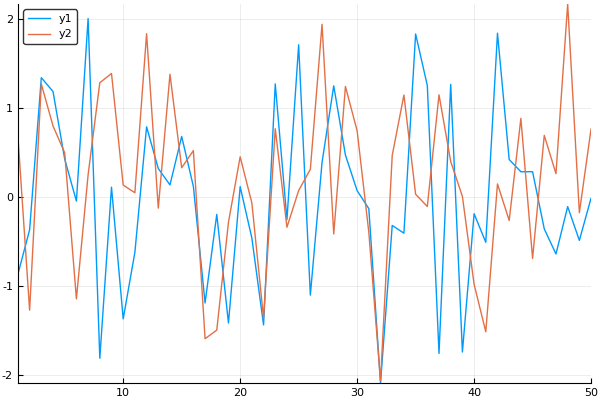

In [38]:
pyplot()  # set the backend to PyPlot
plot(x)

In [41]:
plotly()  # change backend to Plotly
plot(x)

In [65]:
gr()   # change backend to GR
plot(x)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 20 
 
 
 30 
 
 
 40 
 
 
 50 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,170.299 33.4362,111.399 45.1576,257.089 56.879,148.681 68.6004,193.927 80.3217,26.715 92.0431,226.421 103.765,179.552 115.486,139.463 127.207,109.187 
 138.929,153.397 150.65,219.7 162.371,243.954 174.093,138.198 185.814,135.856 197.536,205.783 209.257,325.367 220.978,92.5363 232.7,94.4042 244.421,171.599 
 256.143,313.181 267.864,192.876 279.585,124.332 291.307,273.587 303.028,359.276 314.75,146.469 326.471,134.908 338.192,206.238 349.914,205.397 361.635,304.578 
 373.357,39.8589 385.078,238.918 396.799,305.299 408.521,58.8131 420.242,204.165 431.964,140.71 443.685,210.775 455.406,183.401 467.128,164.621 478.849,247.197 
 490.57,165.108 502.292,42.1287 514.013,195.487 525.735,314.485 537.456,153.16 549.177,219.131 560.899,168.379 572.62,98.0677 584.342,230.187 596.063,168.928 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e9746a; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,153.769 33.4362,182.593 45.1576,268.504 56.879,250.468 68.6004,96.811 80.3217,246.15 92.0431,248.181 103.765,205.063 115.486,106.822 127.207,262.474 
 138.929,142.657 150.65,116.554 162.371,259.438 174.093,139.365 185.814,283.116 197.536,197.523 209.257,246.051 220.978,125.963 232.7,336.966 244.421,245.992 
 256.143,3.93701 267.864,122.335 279.585,291.786 291.307,256.952 303.028,6.93727 314.75,191.721 326.471,226.12 338.192,199.982 349.914,114.057 361.635,157.18 
 373.357,87.1847 385.078,159.122 396.799,384.952 408.521,201.453 420.242,191.509 431.964,242.348 443.685,39.1573 455.406,132.48 467.128,245.032 478.849,54.3059 
 490.57,143.132 502.292,295.117 514.013,217.764 525.735,263.351 537.456,12.3255 549.177,252.409 560.899,129.552 572.62,270.272 584.342,143.844 596.063,243.048 
 
 "/>
 
 
 
 
 y1 
 
 
 
 y2

In [66]:
gr()
@gif for i in 1:20
    plot(x -> sin(x) / (.2i), 0, i, xlim=(0, 20), ylim=(-.75, .75))
    scatter!(x -> cos(x) * .01 * i, 0, i, m=1)
end

INFO: Saved animation to /Users/huazhou/Documents/github.com/Hua-Zhou.github.io/teaching/biostatm280-2017spring/slides/02-juliaintro/tmp.gif


Plots.AnimatedGif("/Users/huazhou/Documents/github.com/Hua-Zhou.github.io/teaching/biostatm280-2017spring/slides/02-juliaintro/tmp.gif")

In [67]:
# Nondeterministic algorithm for plotting functions
# Tries to do higher sampling where the function changes the most
scatter(sin, -3, 3)
plot!(sin)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2 
 
 
 0 
 
 
 2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#e9746a; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 37.9699,193.119 39.3003,195.894 40.6306,198.669 41.961,201.443 54.262,226.926 66.5629,251.748 78.8639,275.403 91.1649,297.411 98.5573,309.656 105.95,321.053 
 113.342,331.519 120.734,340.976 126.985,348.133 133.235,354.482 139.485,359.989 145.735,364.625 152.525,368.646 159.314,371.586 166.103,373.427 172.893,374.156 
 179.152,373.841 185.411,372.579 191.671,370.377 197.93,367.247 204.64,362.88 211.351,357.491 218.062,351.113 224.772,343.786 232.547,334.167 240.322,323.411 
 248.097,311.606 255.872,298.847 269.69,274.143 283.509,247.393 295.627,222.794 307.745,197.634 320.956,170.148 334.168,143.231 347.458,117.369 360.748,93.336 
 368.095,81.0464 375.442,69.5808 382.789,59.0224 390.136,49.448 397.127,41.3154 404.117,34.1902 411.108,28.1191 418.098,23.1423 425.367,19.163 432.635,16.4302 
 439.904,14.9635 447.172,14.7732 453.291,15.6038 459.409,17.3359 465.528,19.9606 471.646,23.4648 479.116,28.9093 486.586,35.5972 494.056,43.4783 501.526,52.4933 
 508.548,61.9413 515.571,72.2689 522.593,83.4074 529.615,95.283 540.864,115.646 552.114,137.35 563.364,160.026 574.614,183.288 576.345,186.894 578.077,190.504 
 579.808,194.115 
 "/>
 
 
 
 
 
 
 
 y1 
 
 
 
 y2

In [68]:
x = randn()
p = plot([x])
@gif for i in 1:100
    x += randn()
    push!(p, x)
end

INFO: Saved animation to /Users/huazhou/Documents/github.com/Hua-Zhou.github.io/teaching/biostatm280-2017spring/slides/02-juliaintro/tmp.gif


Plots.AnimatedGif("/Users/huazhou/Documents/github.com/Hua-Zhou.github.io/teaching/biostatm280-2017spring/slides/02-juliaintro/tmp.gif")

In [26]:
versioninfo()

Julia Version 0.6.2
Commit d386e40* (2017-12-13 18:08 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin15.6.0)
  CPU: Intel(R) Core(TM) i7-6920HQ CPU @ 2.90GHz
  WORD_SIZE: 64
  BLAS: libmkl_rt
  LAPACK: libmkl_rt
  LIBM: libopenlibm
  LLVM: libLLVM-3.9.1 (ORCJIT, skylake)
